In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [6]:
df = pd.read_csv('../results/drift_classification_summary.csv')
df.head()

,Drift Type,Study Area,Drift Area [m^2],Mean Drift Depth [m],Mean Drift Volume [m^3],Std. Drift Depth [m],Median Drift Depth [m],CV Drift Depth,Volume:Area Ratio
0,watertrack,HV,23636.37,0.78,18053.44,0.17,0.79,0.22,0.76
1,watertrack,HV,9069.76,0.78,7044.64,0.20,0.76,0.26,0.78
2,watertrack,HV,27802.66,1.09,30428.81,0.41,1.11,0.38,1.09
3,watertrack,HV,4386.98,0.90,3958.89,0.31,0.83,0.34,0.90
4,watertrack,HV,43782.34,0.96,42064.01,0.33,0.87,0.35,0.96


In [7]:
d = {}

for i in df['Drift Type'].unique():

    d[i] = {}
    driftclass = df[df['Drift Type']==i]
    x = driftclass["Drift Area [m^2]"]
    y = driftclass["Mean Drift Volume [m^3]"]
    d[i]['x'] = x
    d[i]['y'] = y
    
    gradient,intercept,r_value,p_value,std_err=stats.linregress(x,y)
    d[i]['Gradient'] = gradient.round(4)
    d[i]['Intercept'] = intercept.round(4)
    d[i]['R Value'] = r_value.round(5)
    d[i]['P Value'] = p_value.round(5)
    d[i]['Std. Error'] = std_err.round(4)

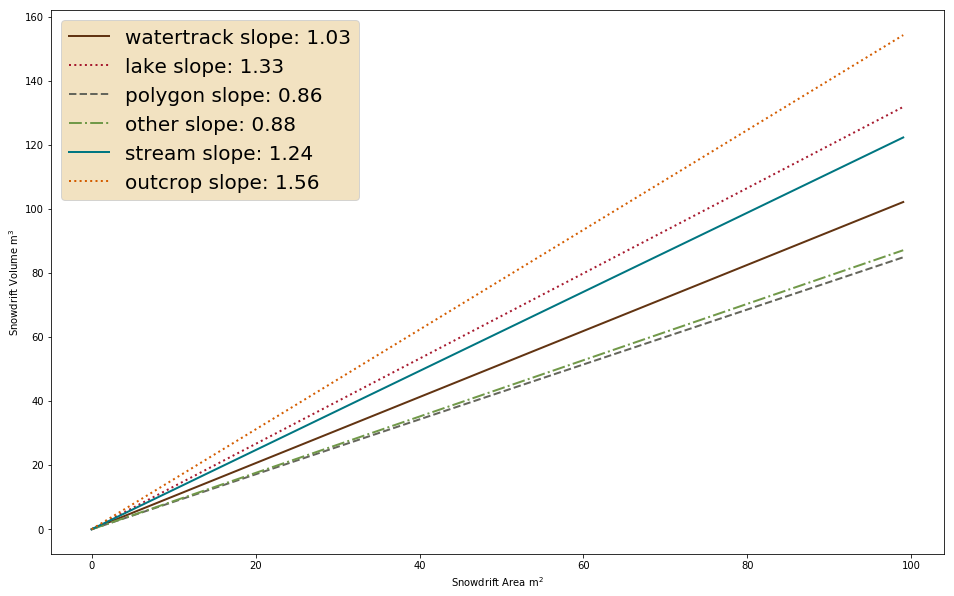

In [19]:
uaclrs = ['#623412', '#A6192E',
          '#65665C', '#719949', '#007681',
          '#D45D00']

# uaclrs = ['#642667', '#623412', '#A6192E',
#           '#65665C', '#719949', '#007681',
#           '#D45D00']


linestyles = ['-', ':', '--', '-.', '-', ':']

plt.figure(figsize=(16,10))

i = 0
for k in d.keys():
    #error = np.random.normal(0.1, 0.02, size=y.shape)
    lbl = k + " slope: " + str(d[k]['Gradient'].round(2))
    x = np.arange(0,100)
    y = d[k]['Gradient'] * x
    plt.plot(x, y, uaclrs[i], ls=linestyles[i], label=lbl, lw=2)
    i+=1

plt.ylabel("Snowdrift Volume m$^3$")
plt.xlabel("Snowdrift Area m$^2$")
leg = plt.legend(loc=2, prop={'size': 20}, frameon=1)
frame = leg.get_frame()
frame.set_facecolor('#EFDBB2')

plt.savefig('../figs/snowdrift_class_area_volume_linreg_all_set_yint0.png',
            dpi=300, bbox_inches='tight')